In [101]:
import pandas as pd
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
import tensorflow as tf
from sklearn.metrics import classification_report

In [102]:
#DECLARE CONSTANTS
IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_FILES = 10000
N_EPOCHS = 300
RANDOM_SEED = 42

In [103]:
#GETTING ALL FILE NAMES
data_files = os.listdir('./data/')
data_files = [f'./data/{file}' for file in data_files]
# data_files.remove('./data/.DS_Store')
N_CATEGORIES = len(data_files)
print(data_files)

['./data/apple.npy', './data/airplane.npy', './data/bird.npy', './data/ambulance.npy', './data/beach.npy', './data/axe.npy', './data/alarm clock.npy', './data/basketball.npy', './data/barn.npy']


In [104]:
#POPULATING TOTAL X AND Y
all_drawings = []
all_categories = []

for idx, file in enumerate(data_files):
    data = np.load(file)[:NUM_FILES]
    for d in data:
        reshaped_img = np.array(np.reshape(d, (-1, 28))).astype(np.float32)
        
        all_drawings.append(reshaped_img)
        all_categories.append(idx)

all_drawings = np.array(all_drawings)

all_categories = np.array(all_categories)

In [105]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(all_drawings, all_categories, test_size=0.2, random_state=RANDOM_SEED)

In [106]:
slice_index = int(len(X_train_full)*0.8)

X_train = X_train_full[:slice_index][..., np.newaxis]
X_valid = X_train_full[slice_index:][..., np.newaxis]

y_train = y_train_full[:slice_index][..., np.newaxis]
y_valid = y_train_full[slice_index:][..., np.newaxis]

X_test = X_test[..., np.newaxis]

In [112]:
model = keras.models.Sequential([
    Conv2D(filters=8, kernel_size=3,padding="same", activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    MaxPool2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    
    BatchNormalization(),
    Dropout(0.5, seed=RANDOM_SEED),
    Dense(units=30,activation="relu"),
    
    BatchNormalization(),
    Dropout(0.5, seed=RANDOM_SEED),
    Dense(units=N_CATEGORIES, activation="softmax"),
])

In [113]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [114]:
history = model.fit(X_train,y_train,epochs = N_EPOCHS, validation_data=(X_valid, y_valid), batch_size=264)

Epoch 1/300
219/219 [==============================] - 1s 4ms/step - loss: 2.1391 - accuracy: 0.3467 - val_loss: 1.1023 - val_accuracy: 0.6488
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 1.4489 - accuracy: 0.5409 - val_loss: 0.8987 - val_accuracy: 0.7166
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 1.2261 - accuracy: 0.6113 - val_loss: 0.8096 - val_accuracy: 0.7490
Epoch 4/300
219/219 [==============================] - 1s 3ms/step - loss: 1.1120 - accuracy: 0.6465 - val_loss: 0.7533 - val_accuracy: 0.7678
Epoch 5/300
219/219 [==============================] - 1s 3ms/step - loss: 1.0320 - accuracy: 0.6743 - val_loss: 0.7077 - val_accuracy: 0.7810
Epoch 6/300
219/219 [==============================] - 1s 3ms/step - loss: 0.9639 - accuracy: 0.6941 - val_loss: 0.6699 - val_accuracy: 0.7939
Epoch 7/300
219/219 [==============================] - 1s 3ms/step - loss: 0.9215 - accuracy: 0.7076 - val_loss: 0.6386 - val_accuracy: 0.8044

Epoch 58/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.8592 - val_loss: 0.3364 - val_accuracy: 0.8958
Epoch 59/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4640 - accuracy: 0.8578 - val_loss: 0.3340 - val_accuracy: 0.8969
Epoch 60/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.8578 - val_loss: 0.3325 - val_accuracy: 0.8965
Epoch 61/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.8586 - val_loss: 0.3337 - val_accuracy: 0.8969
Epoch 62/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4561 - accuracy: 0.8604 - val_loss: 0.3311 - val_accuracy: 0.8973
Epoch 63/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.8605 - val_loss: 0.3297 - val_accuracy: 0.8976
Epoch 64/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.8595 - val_loss: 0.3303 - val_accuracy:

Epoch 115/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8733 - val_loss: 0.2992 - val_accuracy: 0.9076
Epoch 116/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8751 - val_loss: 0.3024 - val_accuracy: 0.9055
Epoch 117/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8727 - val_loss: 0.2994 - val_accuracy: 0.9073
Epoch 118/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8749 - val_loss: 0.3009 - val_accuracy: 0.9065
Epoch 119/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8741 - val_loss: 0.3002 - val_accuracy: 0.9069
Epoch 120/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8755 - val_loss: 0.2981 - val_accuracy: 0.9081
Epoch 121/300
219/219 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8742 - val_loss: 0.2993 - val_ac

219/219 [==============================] - 1s 3ms/step - loss: 0.3840 - accuracy: 0.8822 - val_loss: 0.2896 - val_accuracy: 0.9101
Epoch 172/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8802 - val_loss: 0.2869 - val_accuracy: 0.9112
Epoch 173/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8810 - val_loss: 0.2870 - val_accuracy: 0.9115
Epoch 174/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8810 - val_loss: 0.2854 - val_accuracy: 0.9110
Epoch 175/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8824 - val_loss: 0.2879 - val_accuracy: 0.9099
Epoch 176/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 0.8816 - val_loss: 0.2868 - val_accuracy: 0.9117
Epoch 177/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8818 - val_loss: 0.2865 - val_accuracy: 0.9103

219/219 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8835 - val_loss: 0.2803 - val_accuracy: 0.9117
Epoch 228/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3769 - accuracy: 0.8835 - val_loss: 0.2798 - val_accuracy: 0.9131
Epoch 229/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8840 - val_loss: 0.2807 - val_accuracy: 0.9129
Epoch 230/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8829 - val_loss: 0.2816 - val_accuracy: 0.9124
Epoch 231/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8847 - val_loss: 0.2792 - val_accuracy: 0.9135
Epoch 232/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8828 - val_loss: 0.2796 - val_accuracy: 0.9135
Epoch 233/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8848 - val_loss: 0.2826 - val_accuracy: 0.9115

219/219 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8871 - val_loss: 0.2745 - val_accuracy: 0.9156
Epoch 284/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8872 - val_loss: 0.2761 - val_accuracy: 0.9152
Epoch 285/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8863 - val_loss: 0.2755 - val_accuracy: 0.9151
Epoch 286/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8878 - val_loss: 0.2752 - val_accuracy: 0.9149
Epoch 287/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8872 - val_loss: 0.2745 - val_accuracy: 0.9159
Epoch 288/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8882 - val_loss: 0.2756 - val_accuracy: 0.9153
Epoch 289/300
219/219 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8869 - val_loss: 0.2764 - val_accuracy: 0.9138

In [115]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

563/563 [==============================] - 1s 1ms/step - loss: 0.2633 - accuracy: 0.9192


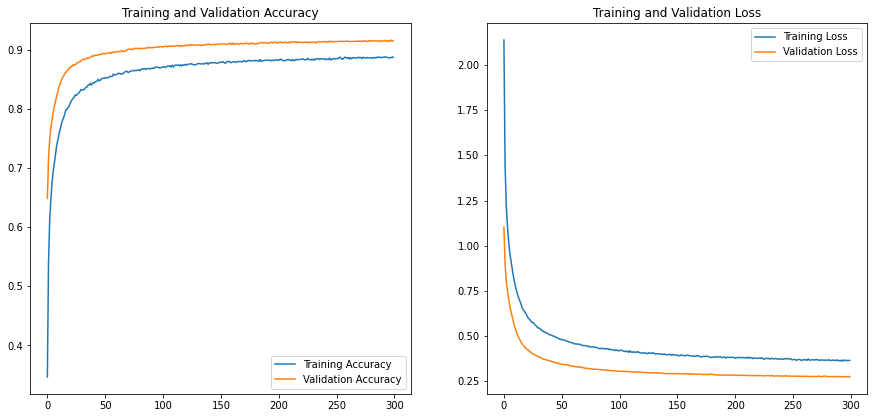

In [116]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [117]:
predictions = model.predict_classes(X_valid)

print(classification_report(y_valid, predictions, target_names = data_files)) 

/home/gabrielzezze/.local/share/virtualenvs/ProjetoML-I6gg8voT/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                        precision    recall  f1-score   support

      ./data/apple.npy       0.97      0.95      0.96      1665
   ./data/airplane.npy       0.89      0.92      0.90      1625
       ./data/bird.npy       0.84      0.83      0.84      1647
  ./data/ambulance.npy       0.93      0.95      0.94      1571
      ./data/beach.npy       0.86      0.93      0.90      1560
        ./data/axe.npy       0.95      0.94      0.94      1582
./data/alarm clock.npy       0.92      0.89      0.90      1526
 ./data/basketball.npy       0.95      0.93      0.94      1639
       ./data/barn.npy       0.94      0.91      0.93      1585

              accuracy                           0.92     14400
             macro avg       0.92      0.92      0.92     14400
          weighted avg       0.92      0.92      0.92     14400



In [796]:
from keras import backend as K

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp], [out]) for out in outputs]

# Testing
test = np.random.random((28, 28, 1))[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
for layer in layer_outs:
    for l in layer:
        print(l.shape)
#         if len(l.shape) < 4:
#             continue
#         for img in l[:, :, :, :]:
#             print(img[:, :, 0].shape)
# #         for img in l:
# #             print(l[:, :, 0].shape)
#             plt.imshow(img[:, :, 0])
#             plt.show()
#             plt.imshow(img[:, :, 1])
#             plt.show()
#             plt.imshow(img[:, :, 2])
#             plt.show()
#             plt.imshow(img[:, :, 3])
#             plt.show()
#             plt.imshow(img[:, :, 4])
#             plt.show()
#             plt.imshow(img[:, :, 5])
#             plt.show()
#             plt.imshow(img[:, :, 6])
#             plt.show()
#             plt.imshow(img[:, :, 7])
#             plt.show()
# #         plt.imshow(l)
# #         plt.show()

(1, 28, 28, 8)
(1, 14, 14, 8)
(1, 14, 14, 16)
(1, 7, 7, 16)
(1, 7, 7, 16)
(1, 784)
(1, 784)
(1, 7)


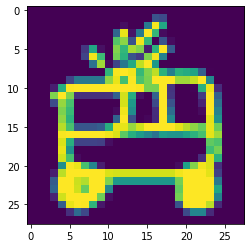

(28, 28, 1, 2)


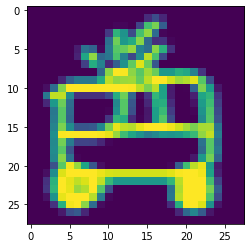

In [795]:
x_in = all_drawings[0]

plt.imshow(x_in)
plt.show()

kernel_in = np.array([
 [ [[1, 0]], [[1, 0]] ],
 [ [[1, 0]],[[1,0]] ], ])

x = tf.constant(x_in[..., np.newaxis][..., np.newaxis], dtype=tf.int32)

kernel = tf.constant(kernel_in, dtype=tf.int32)

print(out.shape)

out = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='SAME')

plt.imshow(out[:, :, :, 0])
plt.show()